# Setup code taken from coursework_1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10b1c76a0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10b1c8f60>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler

# Testing my Adam class

Epoch 1: 5.1s to complete
    error(train)=7.86e-01, acc(train)=7.51e-01, error(valid)=8.19e-01, acc(valid)=7.43e-01


Epoch 2: 4.8s to complete
    error(train)=6.53e-01, acc(train)=7.95e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


Epoch 3: 5.3s to complete
    error(train)=5.88e-01, acc(train)=8.13e-01, error(valid)=6.63e-01, acc(valid)=7.97e-01


Epoch 4: 5.2s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.68e-01, acc(valid)=8.07e-01


Epoch 5: 5.2s to complete
    error(train)=5.96e-01, acc(train)=8.11e-01, error(valid)=7.30e-01, acc(valid)=7.84e-01


Epoch 6: 4.7s to complete
    error(train)=5.81e-01, acc(train)=8.27e-01, error(valid)=7.15e-01, acc(valid)=8.03e-01


Epoch 7: 4.9s to complete
    error(train)=6.64e-01, acc(train)=8.07e-01, error(valid)=8.12e-01, acc(valid)=7.82e-01


Epoch 8: 4.7s to complete
    error(train)=6.27e-01, acc(train)=8.16e-01, error(valid)=7.85e-01, acc(valid)=7.87e-01


Epoch 9: 4.7s to complete
    error(train)=7.26e-01, acc(train)=8.03e-01, error(valid)=9.07e-01, acc(valid)=7.78e-01


Epoch 10: 8.0s to complete
    error(train)=7.22e-01, acc(train)=8.10e-01, error(valid)=9.15e-01, acc(valid)=7.84e-01


Epoch 11: 5.0s to complete
    error(train)=7.62e-01, acc(train)=7.96e-01, error(valid)=9.62e-01, acc(valid)=7.71e-01


Epoch 12: 4.8s to complete
    error(train)=7.18e-01, acc(train)=8.19e-01, error(valid)=9.38e-01, acc(valid)=7.94e-01


Epoch 13: 5.0s to complete
    error(train)=7.39e-01, acc(train)=7.96e-01, error(valid)=9.39e-01, acc(valid)=7.69e-01


Epoch 14: 6.3s to complete
    error(train)=7.19e-01, acc(train)=8.05e-01, error(valid)=9.39e-01, acc(valid)=7.81e-01


Epoch 15: 5.1s to complete
    error(train)=7.00e-01, acc(train)=8.12e-01, error(valid)=9.13e-01, acc(valid)=7.85e-01


Epoch 16: 6.6s to complete
    error(train)=7.03e-01, acc(train)=8.03e-01, error(valid)=9.35e-01, acc(valid)=7.75e-01


Epoch 17: 6.4s to complete
    error(train)=7.31e-01, acc(train)=8.09e-01, error(valid)=9.74e-01, acc(valid)=7.78e-01


Epoch 18: 5.8s to complete
    error(train)=6.89e-01, acc(train)=8.10e-01, error(valid)=9.25e-01, acc(valid)=7.74e-01


Epoch 19: 5.9s to complete
    error(train)=7.09e-01, acc(train)=8.10e-01, error(valid)=9.67e-01, acc(valid)=7.80e-01


Epoch 20: 5.9s to complete
    error(train)=7.33e-01, acc(train)=8.14e-01, error(valid)=1.00e+00, acc(valid)=7.78e-01


Epoch 21: 5.8s to complete
    error(train)=6.75e-01, acc(train)=8.14e-01, error(valid)=9.41e-01, acc(valid)=7.78e-01


Epoch 22: 5.9s to complete
    error(train)=7.58e-01, acc(train)=8.17e-01, error(valid)=1.06e+00, acc(valid)=7.87e-01


Epoch 23: 5.9s to complete
    error(train)=7.18e-01, acc(train)=8.15e-01, error(valid)=1.01e+00, acc(valid)=7.80e-01


Epoch 24: 6.1s to complete
    error(train)=6.90e-01, acc(train)=8.19e-01, error(valid)=9.98e-01, acc(valid)=7.85e-01


Epoch 25: 5.0s to complete
    error(train)=7.02e-01, acc(train)=8.05e-01, error(valid)=9.70e-01, acc(valid)=7.76e-01


Epoch 26: 4.7s to complete
    error(train)=6.63e-01, acc(train)=8.17e-01, error(valid)=9.60e-01, acc(valid)=7.81e-01


Epoch 27: 6.0s to complete
    error(train)=7.79e-01, acc(train)=8.09e-01, error(valid)=1.10e+00, acc(valid)=7.74e-01


Epoch 28: 6.5s to complete
    error(train)=7.51e-01, acc(train)=8.09e-01, error(valid)=1.06e+00, acc(valid)=7.70e-01


Epoch 29: 4.6s to complete
    error(train)=7.11e-01, acc(train)=8.16e-01, error(valid)=1.03e+00, acc(valid)=7.79e-01


Epoch 30: 4.5s to complete
    error(train)=7.35e-01, acc(train)=8.23e-01, error(valid)=1.12e+00, acc(valid)=7.85e-01


Epoch 31: 4.6s to complete
    error(train)=6.99e-01, acc(train)=8.15e-01, error(valid)=1.03e+00, acc(valid)=7.75e-01


Epoch 32: 4.6s to complete
    error(train)=6.82e-01, acc(train)=8.22e-01, error(valid)=1.00e+00, acc(valid)=7.79e-01


Epoch 33: 5.6s to complete
    error(train)=7.00e-01, acc(train)=8.16e-01, error(valid)=1.04e+00, acc(valid)=7.80e-01


Epoch 34: 5.0s to complete
    error(train)=6.88e-01, acc(train)=8.28e-01, error(valid)=1.05e+00, acc(valid)=7.88e-01


Epoch 35: 5.2s to complete
    error(train)=7.13e-01, acc(train)=8.20e-01, error(valid)=1.08e+00, acc(valid)=7.79e-01


Epoch 36: 6.6s to complete
    error(train)=7.79e-01, acc(train)=8.11e-01, error(valid)=1.15e+00, acc(valid)=7.68e-01


Epoch 37: 7.0s to complete
    error(train)=7.62e-01, acc(train)=8.14e-01, error(valid)=1.17e+00, acc(valid)=7.74e-01


Epoch 38: 6.5s to complete
    error(train)=7.09e-01, acc(train)=8.14e-01, error(valid)=1.08e+00, acc(valid)=7.72e-01


Epoch 39: 7.7s to complete
    error(train)=7.56e-01, acc(train)=8.01e-01, error(valid)=1.14e+00, acc(valid)=7.62e-01


Epoch 40: 5.7s to complete
    error(train)=7.91e-01, acc(train)=8.15e-01, error(valid)=1.21e+00, acc(valid)=7.75e-01


Epoch 41: 4.5s to complete
    error(train)=7.54e-01, acc(train)=8.13e-01, error(valid)=1.14e+00, acc(valid)=7.73e-01


Epoch 42: 4.8s to complete
    error(train)=7.31e-01, acc(train)=8.17e-01, error(valid)=1.12e+00, acc(valid)=7.75e-01


Epoch 43: 4.9s to complete
    error(train)=7.37e-01, acc(train)=8.18e-01, error(valid)=1.14e+00, acc(valid)=7.75e-01


Epoch 44: 5.3s to complete
    error(train)=7.69e-01, acc(train)=8.25e-01, error(valid)=1.19e+00, acc(valid)=7.85e-01


Epoch 45: 5.0s to complete
    error(train)=7.93e-01, acc(train)=8.12e-01, error(valid)=1.26e+00, acc(valid)=7.66e-01


Epoch 46: 5.0s to complete
    error(train)=7.65e-01, acc(train)=8.06e-01, error(valid)=1.15e+00, acc(valid)=7.67e-01


Epoch 47: 4.4s to complete
    error(train)=8.67e-01, acc(train)=7.89e-01, error(valid)=1.25e+00, acc(valid)=7.50e-01


Epoch 48: 5.3s to complete
    error(train)=8.04e-01, acc(train)=8.02e-01, error(valid)=1.26e+00, acc(valid)=7.59e-01


Epoch 49: 5.2s to complete
    error(train)=8.52e-01, acc(train)=8.12e-01, error(valid)=1.34e+00, acc(valid)=7.73e-01


Epoch 50: 4.7s to complete
    error(train)=8.20e-01, acc(train)=8.10e-01, error(valid)=1.25e+00, acc(valid)=7.69e-01


Epoch 51: 5.4s to complete
    error(train)=8.36e-01, acc(train)=8.04e-01, error(valid)=1.25e+00, acc(valid)=7.67e-01


Epoch 52: 5.2s to complete
    error(train)=7.69e-01, acc(train)=8.11e-01, error(valid)=1.21e+00, acc(valid)=7.65e-01


Epoch 53: 5.1s to complete
    error(train)=9.02e-01, acc(train)=7.94e-01, error(valid)=1.32e+00, acc(valid)=7.54e-01


Epoch 54: 4.9s to complete
    error(train)=8.58e-01, acc(train)=8.03e-01, error(valid)=1.34e+00, acc(valid)=7.59e-01


Epoch 55: 5.2s to complete
    error(train)=9.07e-01, acc(train)=7.88e-01, error(valid)=1.35e+00, acc(valid)=7.45e-01


Epoch 56: 4.7s to complete
    error(train)=8.33e-01, acc(train)=7.90e-01, error(valid)=1.25e+00, acc(valid)=7.47e-01


Epoch 57: 4.7s to complete
    error(train)=8.75e-01, acc(train)=7.90e-01, error(valid)=1.31e+00, acc(valid)=7.46e-01


Epoch 58: 5.2s to complete
    error(train)=9.02e-01, acc(train)=7.94e-01, error(valid)=1.40e+00, acc(valid)=7.51e-01


Epoch 59: 5.0s to complete
    error(train)=9.07e-01, acc(train)=7.97e-01, error(valid)=1.39e+00, acc(valid)=7.59e-01


Epoch 60: 5.0s to complete
    error(train)=8.88e-01, acc(train)=8.03e-01, error(valid)=1.37e+00, acc(valid)=7.61e-01


Epoch 61: 5.5s to complete
    error(train)=9.25e-01, acc(train)=7.88e-01, error(valid)=1.42e+00, acc(valid)=7.47e-01


Epoch 62: 5.2s to complete
    error(train)=9.81e-01, acc(train)=7.85e-01, error(valid)=1.48e+00, acc(valid)=7.48e-01


Epoch 63: 5.2s to complete
    error(train)=1.01e+00, acc(train)=7.73e-01, error(valid)=1.50e+00, acc(valid)=7.33e-01


Epoch 64: 5.3s to complete
    error(train)=9.86e-01, acc(train)=7.94e-01, error(valid)=1.51e+00, acc(valid)=7.56e-01


Epoch 65: 5.3s to complete
    error(train)=1.02e+00, acc(train)=7.84e-01, error(valid)=1.54e+00, acc(valid)=7.45e-01


Epoch 66: 5.1s to complete
    error(train)=1.11e+00, acc(train)=7.75e-01, error(valid)=1.63e+00, acc(valid)=7.38e-01


Epoch 67: 5.5s to complete
    error(train)=9.83e-01, acc(train)=7.85e-01, error(valid)=1.48e+00, acc(valid)=7.49e-01


Epoch 68: 6.1s to complete
    error(train)=1.01e+00, acc(train)=7.80e-01, error(valid)=1.48e+00, acc(valid)=7.45e-01


Epoch 69: 7.0s to complete
    error(train)=1.02e+00, acc(train)=7.73e-01, error(valid)=1.48e+00, acc(valid)=7.35e-01


Epoch 70: 8.8s to complete
    error(train)=9.33e-01, acc(train)=7.89e-01, error(valid)=1.44e+00, acc(valid)=7.53e-01


Epoch 71: 7.6s to complete
    error(train)=1.09e+00, acc(train)=7.86e-01, error(valid)=1.66e+00, acc(valid)=7.52e-01


Epoch 72: 5.4s to complete
    error(train)=1.02e+00, acc(train)=7.83e-01, error(valid)=1.51e+00, acc(valid)=7.42e-01


Epoch 73: 5.0s to complete
    error(train)=1.06e+00, acc(train)=7.74e-01, error(valid)=1.56e+00, acc(valid)=7.38e-01


Epoch 74: 4.9s to complete
    error(train)=1.15e+00, acc(train)=7.78e-01, error(valid)=1.67e+00, acc(valid)=7.41e-01


Epoch 75: 5.3s to complete
    error(train)=9.98e-01, acc(train)=7.92e-01, error(valid)=1.52e+00, acc(valid)=7.54e-01


Epoch 76: 7.0s to complete
    error(train)=1.05e+00, acc(train)=7.80e-01, error(valid)=1.57e+00, acc(valid)=7.43e-01


Epoch 77: 8.3s to complete
    error(train)=1.02e+00, acc(train)=7.80e-01, error(valid)=1.55e+00, acc(valid)=7.39e-01


Epoch 78: 5.4s to complete
    error(train)=9.64e-01, acc(train)=7.90e-01, error(valid)=1.43e+00, acc(valid)=7.53e-01


Epoch 79: 5.5s to complete
    error(train)=1.02e+00, acc(train)=7.88e-01, error(valid)=1.55e+00, acc(valid)=7.50e-01


Epoch 80: -4.4s to complete
    error(train)=1.05e+00, acc(train)=7.81e-01, error(valid)=1.57e+00, acc(valid)=7.39e-01


Epoch 81: 4.6s to complete
    error(train)=1.07e+00, acc(train)=7.85e-01, error(valid)=1.66e+00, acc(valid)=7.42e-01


Epoch 82: 4.5s to complete
    error(train)=1.05e+00, acc(train)=7.81e-01, error(valid)=1.60e+00, acc(valid)=7.36e-01


Epoch 83: 4.5s to complete
    error(train)=1.02e+00, acc(train)=7.76e-01, error(valid)=1.54e+00, acc(valid)=7.29e-01


Epoch 84: 4.6s to complete
    error(train)=1.03e+00, acc(train)=7.81e-01, error(valid)=1.57e+00, acc(valid)=7.39e-01


Epoch 85: 5.6s to complete
    error(train)=1.07e+00, acc(train)=7.84e-01, error(valid)=1.66e+00, acc(valid)=7.42e-01


Epoch 86: 5.3s to complete
    error(train)=1.02e+00, acc(train)=7.69e-01, error(valid)=1.55e+00, acc(valid)=7.24e-01


Epoch 87: 5.1s to complete
    error(train)=9.74e-01, acc(train)=7.82e-01, error(valid)=1.56e+00, acc(valid)=7.34e-01


Epoch 88: 5.2s to complete
    error(train)=1.07e+00, acc(train)=7.74e-01, error(valid)=1.67e+00, acc(valid)=7.28e-01


Epoch 89: 5.6s to complete
    error(train)=1.01e+00, acc(train)=7.77e-01, error(valid)=1.56e+00, acc(valid)=7.33e-01


Epoch 90: 5.2s to complete
    error(train)=9.96e-01, acc(train)=7.83e-01, error(valid)=1.58e+00, acc(valid)=7.35e-01


Epoch 91: 4.9s to complete
    error(train)=1.10e+00, acc(train)=7.76e-01, error(valid)=1.69e+00, acc(valid)=7.33e-01


Epoch 92: 4.7s to complete
    error(train)=1.02e+00, acc(train)=7.86e-01, error(valid)=1.63e+00, acc(valid)=7.35e-01


Epoch 93: 5.0s to complete
    error(train)=1.05e+00, acc(train)=7.77e-01, error(valid)=1.66e+00, acc(valid)=7.34e-01


Epoch 94: 6.2s to complete
    error(train)=1.02e+00, acc(train)=7.66e-01, error(valid)=1.58e+00, acc(valid)=7.19e-01


Epoch 95: 4.6s to complete
    error(train)=1.07e+00, acc(train)=7.70e-01, error(valid)=1.67e+00, acc(valid)=7.26e-01


Epoch 96: 4.8s to complete
    error(train)=1.08e+00, acc(train)=7.73e-01, error(valid)=1.73e+00, acc(valid)=7.24e-01


Epoch 97: 4.8s to complete
    error(train)=1.15e+00, acc(train)=7.70e-01, error(valid)=1.75e+00, acc(valid)=7.28e-01


Epoch 98: 5.0s to complete
    error(train)=1.04e+00, acc(train)=7.77e-01, error(valid)=1.67e+00, acc(valid)=7.28e-01


Epoch 99: 5.0s to complete
    error(train)=1.07e+00, acc(train)=7.78e-01, error(valid)=1.79e+00, acc(valid)=7.25e-01


Epoch 100: 4.6s to complete
    error(train)=1.11e+00, acc(train)=7.73e-01, error(valid)=1.74e+00, acc(valid)=7.24e-01



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


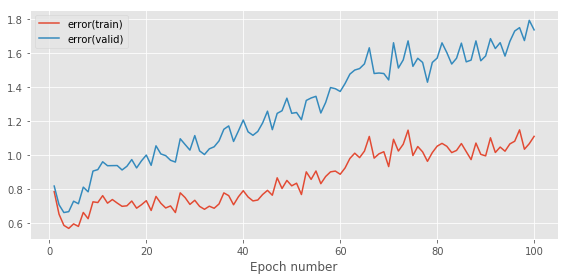

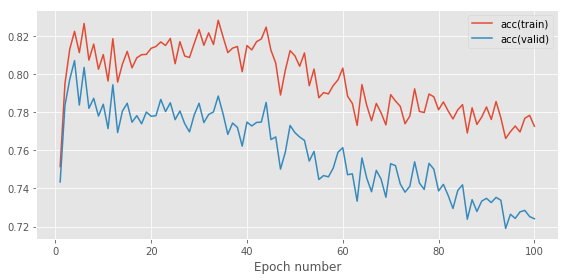

    final error(train) = 1.11e+00
    final error(valid) = 1.74e+00
    final acc(train)   = 7.73e-01
    final acc(valid)   = 7.24e-01
    run time per epoch = 7.14


Epoch 1: 4.1s to complete
    error(train)=1.29e+00, acc(train)=6.33e-01, error(valid)=1.29e+00, acc(valid)=6.30e-01


Epoch 2: 4.1s to complete
    error(train)=1.02e+00, acc(train)=7.02e-01, error(valid)=1.03e+00, acc(valid)=7.02e-01


Epoch 3: 4.1s to complete
    error(train)=8.84e-01, acc(train)=7.37e-01, error(valid)=8.97e-01, acc(valid)=7.32e-01


Epoch 4: 4.2s to complete
    error(train)=7.89e-01, acc(train)=7.63e-01, error(valid)=8.07e-01, acc(valid)=7.55e-01


Epoch 5: 4.2s to complete
    error(train)=7.25e-01, acc(train)=7.79e-01, error(valid)=7.45e-01, acc(valid)=7.74e-01


Epoch 6: 4.1s to complete
    error(train)=6.79e-01, acc(train)=7.90e-01, error(valid)=7.05e-01, acc(valid)=7.81e-01


Epoch 7: 4.1s to complete
    error(train)=6.36e-01, acc(train)=8.03e-01, error(valid)=6.71e-01, acc(valid)=7.92e-01


Epoch 8: 4.1s to complete
    error(train)=6.13e-01, acc(train)=8.09e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


Epoch 9: 4.2s to complete
    error(train)=5.91e-01, acc(train)=8.14e-01, error(valid)=6.32e-01, acc(valid)=7.99e-01


Epoch 10: 4.2s to complete
    error(train)=5.68e-01, acc(train)=8.21e-01, error(valid)=6.17e-01, acc(valid)=8.06e-01


Epoch 11: 4.4s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=6.07e-01, acc(valid)=8.06e-01


Epoch 12: 4.4s to complete
    error(train)=5.50e-01, acc(train)=8.24e-01, error(valid)=6.06e-01, acc(valid)=8.08e-01


Epoch 13: 4.5s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 14: 4.3s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.71e-01, acc(valid)=8.21e-01


Epoch 15: 4.8s to complete
    error(train)=4.95e-01, acc(train)=8.40e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 16: 4.5s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 17: 4.7s to complete
    error(train)=4.90e-01, acc(train)=8.41e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 18: 4.7s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 19: 4.6s to complete
    error(train)=4.70e-01, acc(train)=8.47e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 20: 4.2s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 21: 4.7s to complete
    error(train)=4.64e-01, acc(train)=8.47e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


Epoch 22: 4.3s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 23: 4.4s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 24: 6.7s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 25: 5.3s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 26: 4.9s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 27: 5.1s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 28: 10.7s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


Epoch 29: 7.8s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 30: 4.9s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 31: 5.0s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 32: 5.1s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 33: 5.0s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=5.61e-01, acc(valid)=8.27e-01


Epoch 34: 5.7s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.55e-01, acc(valid)=8.28e-01


Epoch 35: 5.3s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


Epoch 36: 6.0s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


Epoch 37: 5.1s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


Epoch 38: 5.4s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


Epoch 39: 5.0s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=5.71e-01, acc(valid)=8.28e-01


Epoch 40: 4.1s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.65e-01, acc(valid)=8.26e-01


Epoch 41: 4.5s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.74e-01, acc(valid)=8.24e-01


Epoch 42: 4.5s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.81e-01, acc(valid)=8.21e-01


Epoch 43: 5.3s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=5.69e-01, acc(valid)=8.25e-01


Epoch 44: 4.7s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.75e-01, acc(valid)=8.24e-01


Epoch 45: 6.4s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.81e-01, acc(valid)=8.22e-01


Epoch 46: 5.2s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=5.78e-01, acc(valid)=8.26e-01


Epoch 47: 4.4s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.93e-01, acc(valid)=8.20e-01


Epoch 48: 5.8s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=6.06e-01, acc(valid)=8.20e-01


Epoch 49: 4.6s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=5.92e-01, acc(valid)=8.24e-01


Epoch 50: 4.9s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.97e-01, acc(valid)=8.18e-01


Epoch 51: 4.9s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.89e-01, acc(valid)=8.19e-01


Epoch 52: 4.0s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=5.98e-01, acc(valid)=8.20e-01


Epoch 53: 4.0s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=5.90e-01, acc(valid)=8.21e-01


Epoch 54: 4.1s to complete
    error(train)=3.76e-01, acc(train)=8.75e-01, error(valid)=6.05e-01, acc(valid)=8.22e-01


Epoch 55: 4.2s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=6.01e-01, acc(valid)=8.23e-01


Epoch 56: 4.0s to complete
    error(train)=3.59e-01, acc(train)=8.82e-01, error(valid)=5.92e-01, acc(valid)=8.26e-01


Epoch 57: 5.0s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=6.00e-01, acc(valid)=8.21e-01


Epoch 58: 5.5s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=6.06e-01, acc(valid)=8.24e-01


Epoch 59: 5.0s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=6.16e-01, acc(valid)=8.22e-01


Epoch 60: 5.8s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=6.37e-01, acc(valid)=8.13e-01


Epoch 61: 5.3s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=6.26e-01, acc(valid)=8.20e-01


Epoch 62: 6.3s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=6.18e-01, acc(valid)=8.19e-01


Epoch 63: 5.4s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=6.28e-01, acc(valid)=8.18e-01


Epoch 64: 6.0s to complete
    error(train)=3.53e-01, acc(train)=8.83e-01, error(valid)=6.05e-01, acc(valid)=8.23e-01


Epoch 65: 5.7s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=6.27e-01, acc(valid)=8.18e-01


Epoch 66: 4.9s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=6.52e-01, acc(valid)=8.13e-01


Epoch 67: 5.5s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=6.50e-01, acc(valid)=8.17e-01


Epoch 68: 6.0s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=6.61e-01, acc(valid)=8.15e-01


Epoch 69: 4.8s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=6.50e-01, acc(valid)=8.18e-01


Epoch 70: 5.4s to complete
    error(train)=3.71e-01, acc(train)=8.78e-01, error(valid)=6.73e-01, acc(valid)=8.13e-01


Epoch 71: 5.2s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=6.72e-01, acc(valid)=8.12e-01


Epoch 72: 5.5s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=6.55e-01, acc(valid)=8.14e-01


Epoch 73: 5.2s to complete
    error(train)=3.51e-01, acc(train)=8.83e-01, error(valid)=6.39e-01, acc(valid)=8.18e-01


Epoch 74: 5.5s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=6.51e-01, acc(valid)=8.14e-01


Epoch 75: 5.6s to complete
    error(train)=3.55e-01, acc(train)=8.85e-01, error(valid)=6.66e-01, acc(valid)=8.21e-01


Epoch 76: 6.3s to complete
    error(train)=3.59e-01, acc(train)=8.81e-01, error(valid)=6.61e-01, acc(valid)=8.13e-01


Epoch 77: 5.0s to complete
    error(train)=3.56e-01, acc(train)=8.84e-01, error(valid)=6.53e-01, acc(valid)=8.21e-01


Epoch 78: 4.4s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=6.67e-01, acc(valid)=8.16e-01


Epoch 79: 4.3s to complete
    error(train)=3.48e-01, acc(train)=8.86e-01, error(valid)=6.60e-01, acc(valid)=8.22e-01


Epoch 80: 4.4s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=6.81e-01, acc(valid)=8.11e-01


Epoch 81: 6.0s to complete
    error(train)=3.52e-01, acc(train)=8.83e-01, error(valid)=6.71e-01, acc(valid)=8.14e-01


Epoch 82: 6.3s to complete
    error(train)=3.65e-01, acc(train)=8.82e-01, error(valid)=6.91e-01, acc(valid)=8.18e-01


Epoch 83: 5.1s to complete
    error(train)=3.50e-01, acc(train)=8.85e-01, error(valid)=6.83e-01, acc(valid)=8.18e-01


Epoch 84: 5.0s to complete
    error(train)=3.54e-01, acc(train)=8.86e-01, error(valid)=6.91e-01, acc(valid)=8.18e-01


Epoch 85: 5.4s to complete
    error(train)=3.69e-01, acc(train)=8.83e-01, error(valid)=7.26e-01, acc(valid)=8.18e-01


Epoch 86: 5.1s to complete
    error(train)=3.54e-01, acc(train)=8.83e-01, error(valid)=6.92e-01, acc(valid)=8.14e-01


Epoch 87: 5.6s to complete
    error(train)=3.62e-01, acc(train)=8.81e-01, error(valid)=7.12e-01, acc(valid)=8.14e-01


Epoch 88: 5.0s to complete
    error(train)=3.69e-01, acc(train)=8.79e-01, error(valid)=7.08e-01, acc(valid)=8.08e-01


Epoch 89: 4.7s to complete
    error(train)=3.59e-01, acc(train)=8.83e-01, error(valid)=7.07e-01, acc(valid)=8.14e-01


Epoch 90: 5.3s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=7.43e-01, acc(valid)=8.01e-01


Epoch 91: 4.9s to complete
    error(train)=3.65e-01, acc(train)=8.81e-01, error(valid)=7.17e-01, acc(valid)=8.12e-01


Epoch 92: 5.6s to complete
    error(train)=3.51e-01, acc(train)=8.85e-01, error(valid)=7.05e-01, acc(valid)=8.13e-01


Epoch 93: 4.7s to complete
    error(train)=3.65e-01, acc(train)=8.84e-01, error(valid)=7.30e-01, acc(valid)=8.10e-01


Epoch 94: 4.8s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=7.35e-01, acc(valid)=8.04e-01


Epoch 95: 4.9s to complete
    error(train)=3.52e-01, acc(train)=8.88e-01, error(valid)=7.22e-01, acc(valid)=8.17e-01


Epoch 96: 4.4s to complete
    error(train)=3.64e-01, acc(train)=8.80e-01, error(valid)=7.32e-01, acc(valid)=8.07e-01


Epoch 97: 4.0s to complete
    error(train)=3.60e-01, acc(train)=8.82e-01, error(valid)=7.32e-01, acc(valid)=8.13e-01


Epoch 98: 4.0s to complete
    error(train)=3.84e-01, acc(train)=8.77e-01, error(valid)=7.54e-01, acc(valid)=8.11e-01


Epoch 99: 4.0s to complete
    error(train)=3.65e-01, acc(train)=8.82e-01, error(valid)=7.46e-01, acc(valid)=8.06e-01


Epoch 100: 5.2s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=7.48e-01, acc(valid)=8.05e-01



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


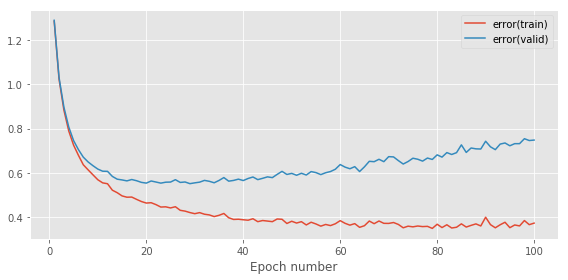

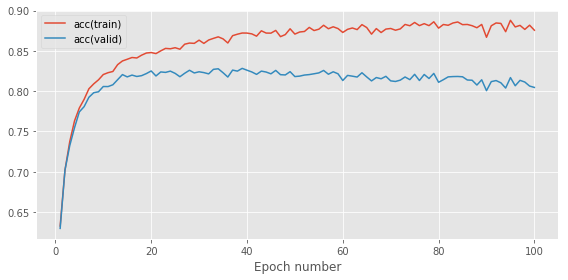

    final error(train) = 3.72e-01
    final error(valid) = 7.48e-01
    final acc(train)   = 8.76e-01
    final acc(valid)   = 8.05e-01
    run time per epoch = 6.67


Epoch 1: 4.6s to complete
    error(train)=3.48e+00, acc(train)=1.73e-01, error(valid)=3.47e+00, acc(valid)=1.74e-01


Epoch 2: 4.7s to complete
    error(train)=2.68e+00, acc(train)=3.67e-01, error(valid)=2.68e+00, acc(valid)=3.74e-01


Epoch 3: 5.1s to complete
    error(train)=2.10e+00, acc(train)=4.68e-01, error(valid)=2.10e+00, acc(valid)=4.68e-01


Epoch 4: 6.4s to complete
    error(train)=1.79e+00, acc(train)=5.26e-01, error(valid)=1.79e+00, acc(valid)=5.23e-01


Epoch 5: 9.8s to complete
    error(train)=1.62e+00, acc(train)=5.61e-01, error(valid)=1.61e+00, acc(valid)=5.57e-01


Epoch 6: 5.5s to complete
    error(train)=1.50e+00, acc(train)=5.86e-01, error(valid)=1.50e+00, acc(valid)=5.82e-01


Epoch 7: 4.4s to complete
    error(train)=1.43e+00, acc(train)=6.05e-01, error(valid)=1.43e+00, acc(valid)=6.00e-01


Epoch 8: 4.4s to complete
    error(train)=1.37e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.15e-01


Epoch 9: 6.9s to complete
    error(train)=1.32e+00, acc(train)=6.33e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


Epoch 10: 6.3s to complete
    error(train)=1.28e+00, acc(train)=6.43e-01, error(valid)=1.28e+00, acc(valid)=6.37e-01


Epoch 11: 7.2s to complete
    error(train)=1.24e+00, acc(train)=6.52e-01, error(valid)=1.25e+00, acc(valid)=6.47e-01


Epoch 12: 5.4s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 13: 4.3s to complete
    error(train)=1.19e+00, acc(train)=6.68e-01, error(valid)=1.19e+00, acc(valid)=6.63e-01


Epoch 14: 4.5s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


Epoch 15: 4.4s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.75e-01


Epoch 16: 4.4s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 17: 4.5s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


Epoch 18: 4.7s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 19: 4.5s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 20: 4.5s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 21: 4.4s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


Epoch 22: 4.4s to complete
    error(train)=1.01e+00, acc(train)=7.12e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 23: 4.3s to complete
    error(train)=9.90e-01, acc(train)=7.17e-01, error(valid)=1.00e+00, acc(valid)=7.11e-01


Epoch 24: 4.6s to complete
    error(train)=9.76e-01, acc(train)=7.21e-01, error(valid)=9.89e-01, acc(valid)=7.15e-01


Epoch 25: 4.4s to complete
    error(train)=9.62e-01, acc(train)=7.24e-01, error(valid)=9.76e-01, acc(valid)=7.18e-01


Epoch 26: 4.4s to complete
    error(train)=9.49e-01, acc(train)=7.26e-01, error(valid)=9.63e-01, acc(valid)=7.19e-01


Epoch 27: 5.3s to complete
    error(train)=9.37e-01, acc(train)=7.31e-01, error(valid)=9.52e-01, acc(valid)=7.24e-01


Epoch 28: 4.5s to complete
    error(train)=9.25e-01, acc(train)=7.33e-01, error(valid)=9.40e-01, acc(valid)=7.27e-01


Epoch 29: 4.6s to complete
    error(train)=9.13e-01, acc(train)=7.36e-01, error(valid)=9.29e-01, acc(valid)=7.28e-01


Epoch 30: 4.5s to complete
    error(train)=9.03e-01, acc(train)=7.38e-01, error(valid)=9.19e-01, acc(valid)=7.30e-01


Epoch 31: 5.0s to complete
    error(train)=8.92e-01, acc(train)=7.41e-01, error(valid)=9.10e-01, acc(valid)=7.33e-01


Epoch 32: 5.5s to complete
    error(train)=8.83e-01, acc(train)=7.42e-01, error(valid)=9.01e-01, acc(valid)=7.35e-01


Epoch 33: 4.5s to complete
    error(train)=8.72e-01, acc(train)=7.47e-01, error(valid)=8.89e-01, acc(valid)=7.38e-01


Epoch 34: 4.3s to complete
    error(train)=8.64e-01, acc(train)=7.48e-01, error(valid)=8.84e-01, acc(valid)=7.38e-01


Epoch 35: 4.4s to complete
    error(train)=8.53e-01, acc(train)=7.51e-01, error(valid)=8.72e-01, acc(valid)=7.42e-01


Epoch 36: 4.4s to complete
    error(train)=8.45e-01, acc(train)=7.54e-01, error(valid)=8.64e-01, acc(valid)=7.45e-01


Epoch 37: 4.4s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.56e-01, acc(valid)=7.46e-01


Epoch 38: 4.5s to complete
    error(train)=8.28e-01, acc(train)=7.57e-01, error(valid)=8.48e-01, acc(valid)=7.48e-01


Epoch 39: 4.6s to complete
    error(train)=8.20e-01, acc(train)=7.59e-01, error(valid)=8.42e-01, acc(valid)=7.48e-01


Epoch 40: 4.5s to complete
    error(train)=8.12e-01, acc(train)=7.61e-01, error(valid)=8.33e-01, acc(valid)=7.51e-01


Epoch 41: 4.3s to complete
    error(train)=8.06e-01, acc(train)=7.63e-01, error(valid)=8.28e-01, acc(valid)=7.54e-01


Epoch 42: 4.4s to complete
    error(train)=7.98e-01, acc(train)=7.64e-01, error(valid)=8.20e-01, acc(valid)=7.54e-01


Epoch 43: 4.4s to complete
    error(train)=7.92e-01, acc(train)=7.66e-01, error(valid)=8.15e-01, acc(valid)=7.56e-01


Epoch 44: 4.4s to complete
    error(train)=7.85e-01, acc(train)=7.68e-01, error(valid)=8.08e-01, acc(valid)=7.58e-01


Epoch 45: 4.5s to complete
    error(train)=7.78e-01, acc(train)=7.70e-01, error(valid)=8.03e-01, acc(valid)=7.59e-01


Epoch 46: 4.3s to complete
    error(train)=7.73e-01, acc(train)=7.70e-01, error(valid)=7.98e-01, acc(valid)=7.61e-01


Epoch 47: 6.7s to complete
    error(train)=7.66e-01, acc(train)=7.72e-01, error(valid)=7.92e-01, acc(valid)=7.62e-01


Epoch 48: 5.0s to complete
    error(train)=7.61e-01, acc(train)=7.73e-01, error(valid)=7.87e-01, acc(valid)=7.64e-01


Epoch 49: 5.4s to complete
    error(train)=7.54e-01, acc(train)=7.76e-01, error(valid)=7.81e-01, acc(valid)=7.68e-01


Epoch 50: 5.4s to complete
    error(train)=7.49e-01, acc(train)=7.77e-01, error(valid)=7.76e-01, acc(valid)=7.67e-01


Epoch 51: 5.7s to complete
    error(train)=7.43e-01, acc(train)=7.78e-01, error(valid)=7.71e-01, acc(valid)=7.69e-01


Epoch 52: 4.8s to complete
    error(train)=7.38e-01, acc(train)=7.79e-01, error(valid)=7.67e-01, acc(valid)=7.71e-01


Epoch 53: 4.5s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.63e-01, acc(valid)=7.69e-01


Epoch 54: 4.5s to complete
    error(train)=7.28e-01, acc(train)=7.81e-01, error(valid)=7.59e-01, acc(valid)=7.71e-01


Epoch 55: 4.8s to complete
    error(train)=7.25e-01, acc(train)=7.83e-01, error(valid)=7.55e-01, acc(valid)=7.74e-01


Epoch 56: 4.5s to complete
    error(train)=7.19e-01, acc(train)=7.84e-01, error(valid)=7.51e-01, acc(valid)=7.75e-01


Epoch 57: 5.2s to complete
    error(train)=7.15e-01, acc(train)=7.85e-01, error(valid)=7.48e-01, acc(valid)=7.76e-01


Epoch 58: 4.8s to complete
    error(train)=7.10e-01, acc(train)=7.87e-01, error(valid)=7.43e-01, acc(valid)=7.77e-01


Epoch 59: 4.5s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.39e-01, acc(valid)=7.77e-01


Epoch 60: 6.5s to complete
    error(train)=7.02e-01, acc(train)=7.88e-01, error(valid)=7.37e-01, acc(valid)=7.78e-01


Epoch 61: 9.6s to complete
    error(train)=6.98e-01, acc(train)=7.90e-01, error(valid)=7.33e-01, acc(valid)=7.79e-01


Epoch 62: 6.4s to complete
    error(train)=6.94e-01, acc(train)=7.90e-01, error(valid)=7.29e-01, acc(valid)=7.82e-01


Epoch 63: 7.2s to complete
    error(train)=6.90e-01, acc(train)=7.92e-01, error(valid)=7.25e-01, acc(valid)=7.81e-01


Epoch 64: 6.8s to complete
    error(train)=6.88e-01, acc(train)=7.93e-01, error(valid)=7.25e-01, acc(valid)=7.81e-01


Epoch 65: 6.0s to complete
    error(train)=6.83e-01, acc(train)=7.94e-01, error(valid)=7.20e-01, acc(valid)=7.82e-01


Epoch 66: 5.6s to complete
    error(train)=6.79e-01, acc(train)=7.94e-01, error(valid)=7.16e-01, acc(valid)=7.83e-01


Epoch 67: 6.7s to complete
    error(train)=6.76e-01, acc(train)=7.95e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


Epoch 68: 8.1s to complete
    error(train)=6.73e-01, acc(train)=7.96e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


Epoch 69: 9.5s to complete
    error(train)=6.69e-01, acc(train)=7.97e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


Epoch 70: 6.1s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=7.04e-01, acc(valid)=7.86e-01


Epoch 71: 7.8s to complete
    error(train)=6.62e-01, acc(train)=7.99e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


Epoch 72: 5.9s to complete
    error(train)=6.59e-01, acc(train)=7.99e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


Epoch 73: 8.6s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


Epoch 74: 7.6s to complete
    error(train)=6.52e-01, acc(train)=8.02e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


Epoch 75: 7.6s to complete
    error(train)=6.49e-01, acc(train)=8.02e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


Epoch 76: 5.4s to complete
    error(train)=6.47e-01, acc(train)=8.03e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


Epoch 77: 8.6s to complete
    error(train)=6.43e-01, acc(train)=8.04e-01, error(valid)=6.87e-01, acc(valid)=7.91e-01


Epoch 78: 7.9s to complete
    error(train)=6.42e-01, acc(train)=8.02e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


Epoch 79: 5.8s to complete
    error(train)=6.38e-01, acc(train)=8.05e-01, error(valid)=6.84e-01, acc(valid)=7.89e-01


Epoch 80: 4.6s to complete
    error(train)=6.35e-01, acc(train)=8.06e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01


Epoch 81: 4.5s to complete
    error(train)=6.33e-01, acc(train)=8.07e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


Epoch 82: 4.6s to complete
    error(train)=6.31e-01, acc(train)=8.08e-01, error(valid)=6.77e-01, acc(valid)=7.94e-01


Epoch 83: 4.6s to complete
    error(train)=6.29e-01, acc(train)=8.08e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


Epoch 84: 4.7s to complete
    error(train)=6.27e-01, acc(train)=8.08e-01, error(valid)=6.74e-01, acc(valid)=7.92e-01


Epoch 85: 4.9s to complete
    error(train)=6.24e-01, acc(train)=8.09e-01, error(valid)=6.72e-01, acc(valid)=7.94e-01


Epoch 86: 5.3s to complete
    error(train)=6.21e-01, acc(train)=8.09e-01, error(valid)=6.69e-01, acc(valid)=7.94e-01


Epoch 87: 4.8s to complete
    error(train)=6.18e-01, acc(train)=8.11e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 88: 6.9s to complete
    error(train)=6.17e-01, acc(train)=8.10e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


Epoch 89: 4.4s to complete
    error(train)=6.16e-01, acc(train)=8.11e-01, error(valid)=6.65e-01, acc(valid)=7.97e-01


Epoch 90: 4.9s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.63e-01, acc(valid)=7.96e-01


Epoch 91: 4.5s to complete
    error(train)=6.09e-01, acc(train)=8.13e-01, error(valid)=6.60e-01, acc(valid)=7.96e-01


Epoch 92: 4.3s to complete
    error(train)=6.08e-01, acc(train)=8.12e-01, error(valid)=6.59e-01, acc(valid)=7.98e-01


Epoch 93: 4.7s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=6.57e-01, acc(valid)=8.00e-01


Epoch 94: 4.6s to complete
    error(train)=6.03e-01, acc(train)=8.14e-01, error(valid)=6.55e-01, acc(valid)=8.00e-01


Epoch 95: 4.5s to complete
    error(train)=6.02e-01, acc(train)=8.14e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 96: 4.5s to complete
    error(train)=6.00e-01, acc(train)=8.15e-01, error(valid)=6.54e-01, acc(valid)=8.00e-01


Epoch 97: 4.5s to complete
    error(train)=5.96e-01, acc(train)=8.16e-01, error(valid)=6.50e-01, acc(valid)=8.02e-01


Epoch 98: 4.4s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.50e-01, acc(valid)=8.01e-01


Epoch 99: 4.4s to complete
    error(train)=5.94e-01, acc(train)=8.17e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 100: 6.1s to complete
    error(train)=5.91e-01, acc(train)=8.17e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


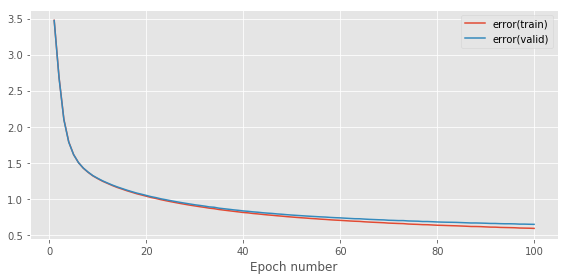

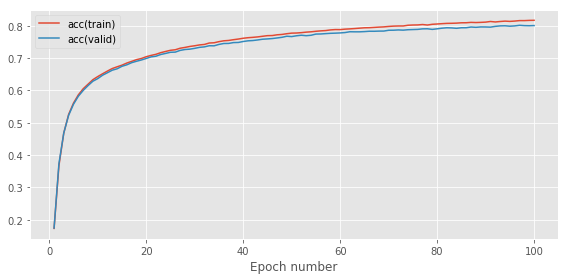

    final error(train) = 5.91e-01
    final error(valid) = 6.47e-01
    final acc(train)   = 8.17e-01
    final acc(valid)   = 8.01e-01
    run time per epoch = 7.10


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
learning_rates = [1e-3, 1e-4, 1e-5]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_rate in learning_rates:

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    scheduler = ConstantLearningRateScheduler(learning_rate)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('learning_rate={0:.2f}'
          .format(learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    